In [1747]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1748]:
input_path = r"D:\Bud Thermography Data\round_3\RIES3.0_B21_N01.npy"
# input_path = r"C:\Users\Mud\Desktop\2ndPaper\roi_data\size-21\round_5\[ROI]CON5.0_B11_N08.npy"

In [1749]:
def normalize_mean_method(video_array):
    mean = np.mean(video_array[:30, :, :], axis=0, keepdims=True)
    nomarlized = np.maximum(video_array - mean, 0)
    return nomarlized


# convert a np array to an avi video
# input shape: (frames, height, width)
def convert_to_avi(input_path):
    video_array = np.load(input_path)
    print(video_array.shape)

    # convert into uint8 range of 0-255
    filename = input_path.split("\\")[-1].split(".")[0] + ".avi"

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(f'./{filename}', fourcc, 30.0, (video_array.shape[2], video_array.shape[1]))

    # video_array = normalize_mean_method(video_array)
    global_min, global_max = 0.0, 1132.3999999999996
    video_array = ((video_array - global_min) / (global_max - global_min) * 255).astype(np.uint8)
    rgbs = np.stack([cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB) for frame in video_array], axis=0)

    for i, frame in enumerate(rgbs):
        out.write(frame)

    out.release()
    print(f'Saved video: {filename}')
    return rgbs


rgbs = convert_to_avi(input_path)

(600, 480, 640)
Saved video: RIES3.avi


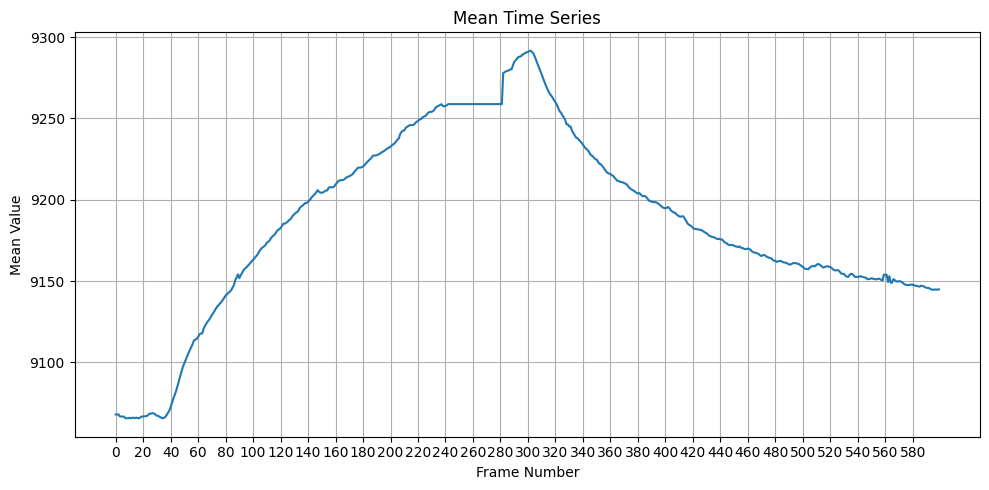

In [1750]:
# plot the mean time series of the video
def plot_mean_time_series(video_array):
    mean_time_series = np.mean(video_array, axis=(1, 2))

    plt.figure(figsize=(10, 5))
    plt.plot(mean_time_series)
    plt.title('Mean Time Series')
    plt.xlabel('Frame Number')
    plt.ylabel('Mean Value')
    plt.xticks(np.arange(0, len(mean_time_series), step=20))
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_mean_time_series(np.load(input_path))

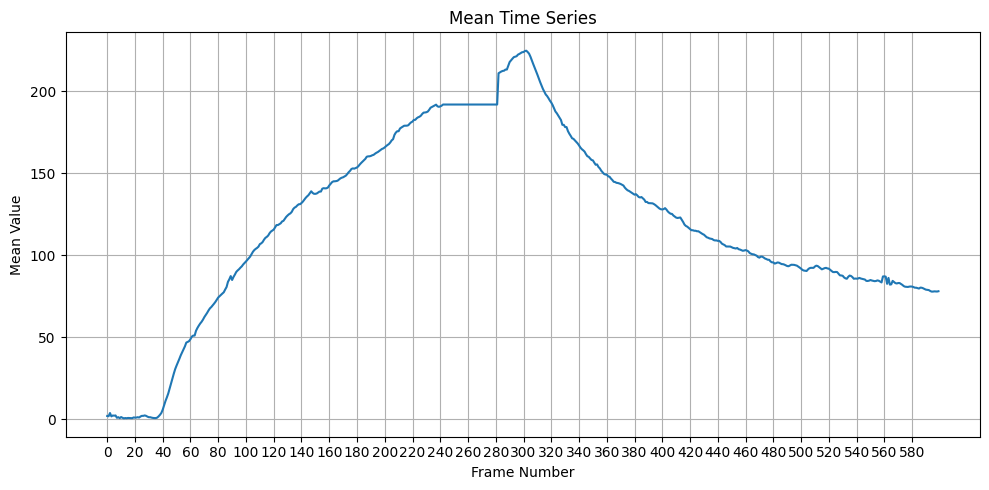

In [1751]:
plot_mean_time_series(normalize_mean_method(np.load(input_path)))

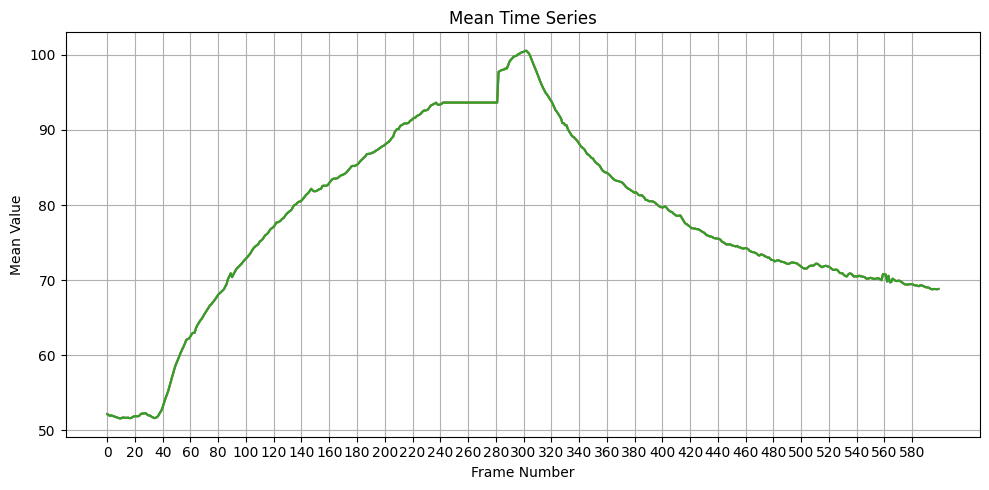

In [1752]:
plot_mean_time_series(rgbs)